In [1]:
%load_ext autoreload
%autoreload 2

# Defaults

In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
import itertools

In [2]:
import loan_approval_lib
from loan_approval_lib import logspace, linspace

In [3]:
data = loan_approval_lib.load_data()

In [4]:
data_train = data['train']

In [5]:
data_test = data['test']

In [6]:
data_train

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,10,0
58641,58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,8,1
58642,58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2,1
58643,58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3,0


In [7]:
data_test

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
39093,97738,22,31200,MORTGAGE,2.0,DEBTCONSOLIDATION,B,3000,10.37,0.10,N,4
39094,97739,22,48000,MORTGAGE,6.0,EDUCATION,A,7000,6.03,0.15,N,3
39095,97740,51,60000,MORTGAGE,0.0,PERSONAL,A,15000,7.51,0.25,N,25
39096,97741,22,36000,MORTGAGE,4.0,PERSONAL,D,14000,15.62,0.39,Y,4


In [8]:
data_train_loan_status_accept = data_train[data_train['loan_status'] == 0]
data_train_loan_status_deny = data_train[data_train['loan_status'] == 1]

In [9]:
for default_record, df1 in data_train.groupby('cb_person_default_on_file'):
    for loan_status, df2 in df1.groupby('loan_status'):
        print(f'loan_status={loan_status}, default={default_record}, {len(df2)}')
        

loan_status=0, default=N, 44194
loan_status=1, default=N, 5749
loan_status=0, default=Y, 6101
loan_status=1, default=Y, 2601


In [10]:
# default N
print(5749 / (44194+5749))

# default Y
print(2601 / (6101+2601))

0.11511122679855035
0.29889680533210755


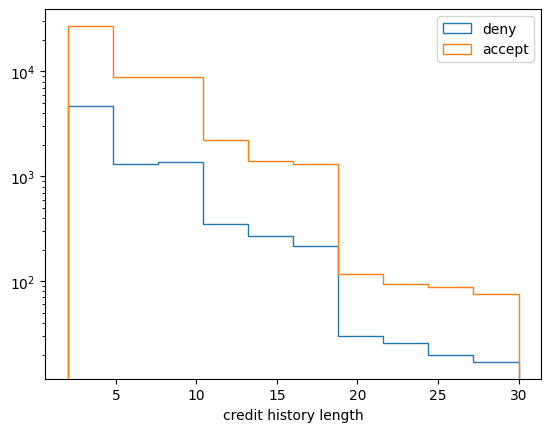

In [22]:
column = 'cb_person_cred_hist_length'

data_deny = data_train_loan_status_deny[column]
data_accept = data_train_loan_status_accept[column]

_ = plt.hist(
    data_deny,
    bins=10, #logspace(data_train_loan_status_deny[column]),
    histtype='step',
    density=False,
    label='deny',
)
_ = plt.hist(
    data_accept,
    bins=10, #logspace(data_train_loan_status_accept[column]),
    histtype='step',
    density=False,
    label='accept',
)
plt.xlabel('credit history length')
#plt.xscale('log')
plt.legend()
plt.yscale('log')
None

In [15]:
data_train_loan_status_accept[['cb_person_cred_hist_length']]

,cb_person_cred_hist_length
0,14
1,2
2,10
3,5
4,3
...,...
58637,4
58639,4
58640,10
58643,3


In [19]:
# Sanity check
tmp = data_train_loan_status_accept[['cb_person_cred_hist_length']]
tmp = tmp[tmp['cb_person_cred_hist_length'] == 10]
tmp

,cb_person_cred_hist_length
2,10
40,10
96,10
103,10
109,10
...,...
58511,10
58572,10
58579,10
58593,10


In [20]:
(
    data_train_loan_status_accept[['id', 'cb_person_cred_hist_length']]
        .groupby('cb_person_cred_hist_length')
        .count()
        .rename({'id': 'count'})
)

,id
cb_person_cred_hist_length,
2,9042
3,9160
4,9000
5,2906
6,2947
7,2968
8,2999
9,3037
10,2921


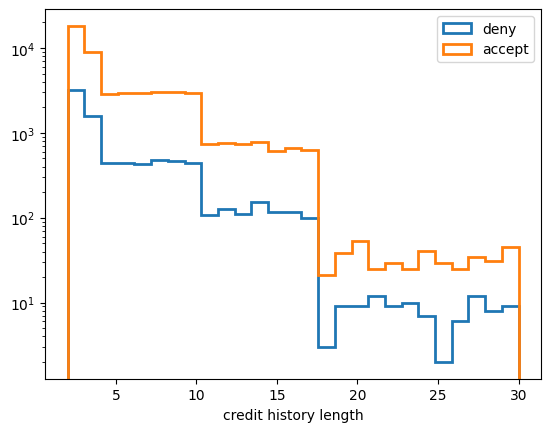

In [65]:
column = 'cb_person_cred_hist_length'

data_deny = data_train_loan_status_deny[['id', 'cb_person_cred_hist_length']]
data_accept = data_train_loan_status_accept[['id', 'cb_person_cred_hist_length']]

_ = plt.hist(
    data_deny[column],
    bins=linspace(data_deny[column]), #logspace(data_train_loan_status_deny[column]),
    histtype='step',
    #density=True,
    label='deny',
    linewidth=2,
)
_ = plt.hist(
    data_accept[column],
    bins=linspace(data_accept[column]), #logspace(data_train_loan_status_accept[column]),
    histtype='step',
    #density=True,
    label='accept',
    linewidth=2,
)
plt.xlabel('credit history length')
#plt.xscale('log')
plt.legend()
plt.yscale('log')

plt.savefig('credit_history_length.png')

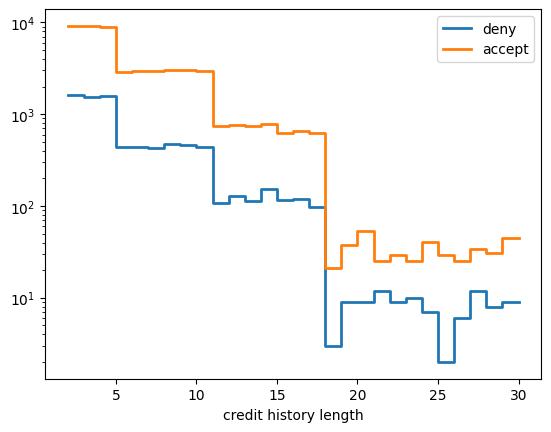

In [66]:
column = 'cb_person_cred_hist_length'

data_deny = data_train_loan_status_deny[['id', 'cb_person_cred_hist_length']]
data_accept = data_train_loan_status_accept[['id', 'cb_person_cred_hist_length']]

h_data_deny = numpy.histogram(data_deny[column], bins=numpy.ptp(data_deny[column]))
h_data_accept = numpy.histogram(data_accept[column], bins=numpy.ptp(data_accept[column]))

_ = plt.step(
    h_data_deny[1],
    numpy.concatenate([[h_data_deny[0][0]], h_data_deny[0]]),
    label='deny',
    linewidth=2,
)
_ = plt.step(
    h_data_accept[1],
    numpy.concatenate([[h_data_accept[0][0]], h_data_accept[0]]),
    label='accept',
    linewidth=2,
)
plt.xlabel('credit history length')
#plt.xscale('log')
plt.legend()
plt.yscale('log')

plt.savefig('credit_history_length_1000.png')

In [35]:
x = data_train['cb_person_cred_hist_length'].to_numpy()
x = x.reshape(-1, 1)

y = data_train['loan_status'].to_numpy()

In [36]:
import sklearn

model = sklearn.linear_model.LogisticRegression()

clf = model.fit(x, y)

clf

LogisticRegression()

In [37]:
clf.score(x, y)

0.8576178702361668

In [67]:
x1 = data_test['cb_person_cred_hist_length'].to_numpy()
x1 = x1.reshape(-1, 1)

y1 = clf.predict(x1)

data_test_submission = pandas.DataFrame(
    {
        'id': data_test['id'],
        'loan_status': y1,
    }
)
data_test_submission

,id,loan_status
0,58645,0
1,58646,0
2,58647,0
3,58648,0
4,58649,0
...,...,...
39093,97738,0
39094,97739,0
39095,97740,0
39096,97741,0


In [68]:
y1.shape

(39098,)

In [32]:
data_test_submission.to_csv('data_test_submission_8_credit_history.csv', index=False)

In [69]:
data_test_submission[data_test_submission['loan_status'] != 0]

,id,loan_status


In [38]:
sum(y1)

np.int64(0)

# Add the test distribution

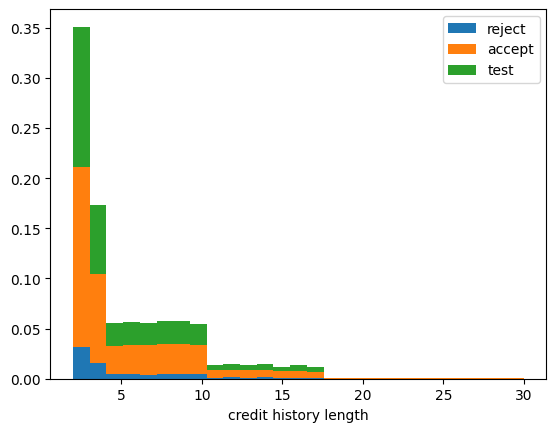

In [77]:
column = 'cb_person_cred_hist_length'

data_deny = data_train_loan_status_deny[['id', 'cb_person_cred_hist_length']]
data_accept = data_train_loan_status_accept[['id', 'cb_person_cred_hist_length']]

data_test = data_test[['id', 'cb_person_cred_hist_length']]

data_deny_min = data_deny[column].min()
data_deny_max = data_deny[column].max()

data_accept_min = data_accept[column].min()
data_accept_max = data_accept[column].max()

data_test_min = data_test[column].min()
data_test_max = data_test[column].max()

data_all_min = min(data_deny_min, data_accept_min, data_test_min)
data_all_max = max(data_deny_max, data_accept_max, data_test_max)

_ = plt.hist(
    [data_deny[column], data_accept[column], data_test[column]],
    bins=numpy.linspace(data_all_min, data_all_max, data_all_max - data_all_min), #logspace(data_train_loan_status_accept[column]),
    #histtype='step',
    density=True,
    label=['reject', 'accept', 'test'],
    stacked=True,
)

plt.xlabel('credit history length')
#plt.xscale('log')
plt.legend()
#plt.yscale('log')

plt.savefig('credit_history_length_with_test.png')

In [78]:
y2 = clf.predict_proba(x1)

data_test_submission_prob = pandas.DataFrame(
    {
        'id': data_test['id'],
        'loan_status': y2[:, 1],
    }
)
data_test_submission_prob

,id,loan_status
0,58645,0.143389
1,58646,0.142859
2,58647,0.143389
3,58648,0.142067
4,58649,0.142859
...,...,...
39093,97738,0.142859
39094,97739,0.143124
39095,97740,0.137389
39096,97741,0.142859


In [79]:
print(y2[:, 1].shape)

(39098,)


In [46]:
data_test_submission_prob.to_csv('data_test_submission_prob_8_credit_history.csv', index=False)

In [80]:
y3 = clf.predict_proba(x1)

data_test_submission_prob = pandas.DataFrame(
    {
        'id': data_test['id'],
        'loan_status': y3[:, 0],
    }
)
data_test_submission_prob

,id,loan_status
0,58645,0.856611
1,58646,0.857141
2,58647,0.856611
3,58648,0.857933
4,58649,0.857141
...,...,...
39093,97738,0.857141
39094,97739,0.856876
39095,97740,0.862611
39096,97741,0.857141


In [81]:
data_test_submission_prob.to_csv('data_test_submission_prob_inverse_8_credit_history.csv', index=False)